In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import ast

In [5]:
df = pd.read_csv('tweet-svm/svm_log.csv')

In [7]:
# score_reportを辞書型に変換して読み込み
report_dic = ast.literal_eval(df['score_report'][0])
print(report_dic)

{'neg': {'precision': 0.5, 'recall': 0.18181818181818182, 'f1-score': 0.26666666666666666, 'support': 11}, 'neu': {'precision': 0.3333333333333333, 'recall': 0.4, 'f1-score': 0.3636363636363636, 'support': 10}, 'pos': {'precision': 0.35714285714285715, 'recall': 0.5555555555555556, 'f1-score': 0.43478260869565216, 'support': 9}, 'accuracy': 0.36666666666666664, 'macro avg': {'precision': 0.3968253968253968, 'recall': 0.37912457912457914, 'f1-score': 0.35502854633289416, 'support': 30}, 'weighted avg': {'precision': 0.4015873015873016, 'recall': 0.36666666666666664, 'f1-score': 0.3494246815985946, 'support': 30}}


c:\users\zxxxs\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\zxxxs\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 27604 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\zxxxs\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 36611 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\zxxxs\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\zxxxs\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 27604 missing from current font.
  font.set_text(s, 

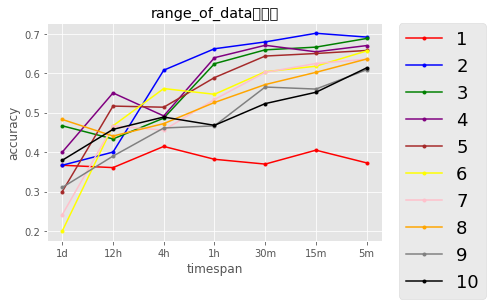

In [45]:
# range_of_dataの比較
# 縦軸：accuracy, 横軸：timespan ,定数：kind_of_data

alist = {1:'neg_count, neu_count, pos_count',
         2:'com_ave, tweet_cont',
         3:'all'}

df_list = []

df = pd.read_csv('tweet-svm/svm_log.csv',usecols=['timespan','kind_of_data','accuracy','range_of_data'])
df = df.query('kind_of_data == "neg_count, neu_count, pos_count"')
df = df.drop(columns=['kind_of_data'])
for i in range (1,11):
    df_list.append(df.groupby("range_of_data").get_group(i))

#1つ目の表示するデータを用意
x = df_list[k]['timespan']
k=0
y1 = df_list[k]['accuracy']
y2 = df_list[k+1]['accuracy']
y3 = df_list[k+2]['accuracy']
y4 = df_list[k+3]['accuracy']
y5 = df_list[k+4]['accuracy']
y6 = df_list[k+5]['accuracy']
y7 = df_list[k+6]['accuracy']
y8 = df_list[k+7]['accuracy']
y9 = df_list[k+8]['accuracy']
y10 = df_list[k+9]['accuracy']

#plt.xticks(['1d','12h','4h','1h','30m','15m','5m'])

plt.plot(x, y1,label="1", color = 'red', marker = '.')
plt.plot(x, y2,label="2", color = 'blue', marker = '.')
plt.plot(x, y3,label="3", color = 'green', marker = '.')
plt.plot(x, y4,label="4", color = 'purple', marker = '.')
plt.plot(x, y5,label="5", color = 'brown', marker = '.')
plt.plot(x, y6,label="6", color = 'yellow', marker = '.')
plt.plot(x, y7,label="7", color = 'pink', marker = '.')
plt.plot(x, y8,label="8", color = 'orange', marker = '.')
plt.plot(x, y9,label="9", color = 'gray', marker = '.')
plt.plot(x, y10,label="10", color = 'black', marker = '.')

plt.xlabel("timespan")
plt.ylabel("accuracy")
plt.title("range_of_dataの比較")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)

#グラフ表示
plt.show()

c:\users\zxxxs\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\zxxxs\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 27604 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\zxxxs\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 36611 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\zxxxs\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\zxxxs\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 27604 missing from current font.
  font.set_text(s, 

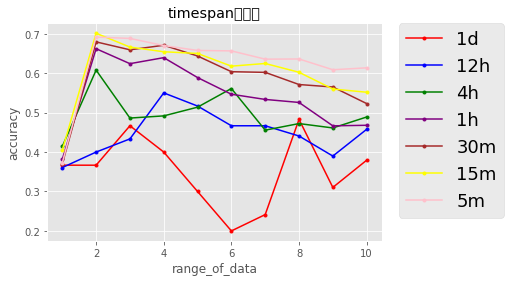

In [44]:
# timespanの比較
# 縦軸：accuracy, 横軸：data_range, 定数：kind_of_data

alist = {1:'neg_count, neu_count, pos_count',
         2:'com_ave, tweet_cont',
         3:'all'}
tlist = ['1d','12h','4h','1h','30m','15m','5m']
df_list = []

df = pd.read_csv('tweet-svm/svm_log.csv',usecols=['timespan','kind_of_data','accuracy','range_of_data'])
df = df.query('kind_of_data == "neg_count, neu_count, pos_count"')
df = df.drop(columns=['kind_of_data'])
for timespan in tlist:
    df_list.append(df.groupby("timespan").get_group(f'{timespan}'))

#1つ目の表示するデータを用意
x = df_list[k]['range_of_data']
k=0
y1 = df_list[k]['accuracy']
y2 = df_list[k+1]['accuracy']
y3 = df_list[k+2]['accuracy']
y4 = df_list[k+3]['accuracy']
y5 = df_list[k+4]['accuracy']
y6 = df_list[k+5]['accuracy']
y7 = df_list[k+6]['accuracy']

plt.plot(x, y1,label="1d", color = 'red', marker = '.')
plt.plot(x, y2,label="12h", color = 'blue', marker = '.')
plt.plot(x, y3,label="4h", color = 'green', marker = '.')
plt.plot(x, y4,label="1h", color = 'purple', marker = '.')
plt.plot(x, y5,label="30m", color = 'brown', marker = '.')
plt.plot(x, y6,label="15m", color = 'yellow', marker = '.')
plt.plot(x, y7,label="5m", color = 'pink', marker = '.')

plt.xlabel("range_of_data")
plt.ylabel("accuracy")
plt.title("timespanの比較")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)

#グラフ表示
plt.show()

c:\users\zxxxs\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\zxxxs\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 27604 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\zxxxs\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:240: RuntimeWarning: Glyph 36611 missing from current font.
  font.set_text(s, 0.0, flags=flags)
c:\users\zxxxs\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 12398 missing from current font.
  font.set_text(s, 0, flags=flags)
c:\users\zxxxs\appdata\local\programs\python\python38\lib\site-packages\matplotlib\backends\backend_agg.py:203: RuntimeWarning: Glyph 27604 missing from current font.
  font.set_text(s, 

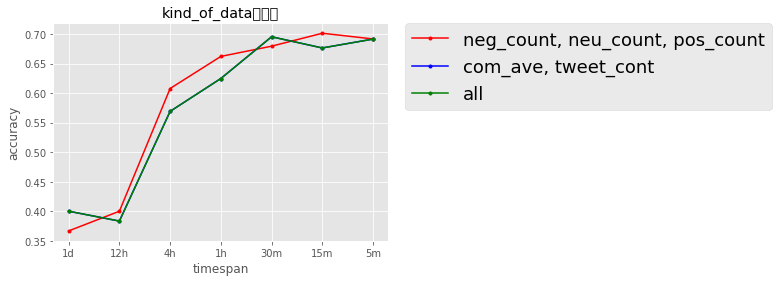

In [50]:
# kind_of_dataの比較
# 縦軸：accuracy, 横軸：timspan ,定数：data_tange
# 縦軸：accuracy, 横軸：data_tange ,定数：timespan
df_list=[]
klist = ['neg_count, neu_count, pos_count',
           'com_ave, tweet_cont',
           'all']

df = pd.read_csv('tweet-svm/svm_log.csv',usecols=['timespan','kind_of_data','accuracy','range_of_data'])
df = df.query('range_of_data == 2')
df = df.drop(columns=['range_of_data'])
for kind in klist:
    df_list.append(df.groupby("kind_of_data").get_group(f'{kind}'))

#1つ目の表示するデータを用意

k=0
x = df_list[k]['timespan']
y1 = df_list[k]['accuracy']
y2 = df_list[k+1]['accuracy']
y3 = df_list[k+2]['accuracy']

plt.plot(x, y1,label="neg_count, neu_count, pos_count", color = 'red', marker = '.')
plt.plot(x, y2,label="com_ave, tweet_cont", color = 'blue', marker = '.')
plt.plot(x, y3,label="all", color = 'green', marker = '.')

plt.xlabel("timespan")
plt.ylabel("accuracy")
plt.title("kind_of_dataの比較")

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=18)

#グラフ表示
plt.show()

In [48]:
print(df_list)

[   timespan                     kind_of_data  accuracy
7        1d  neg_count, neu_count, pos_count  0.366667
8       12h  neg_count, neu_count, pos_count  0.400000
9        4h  neg_count, neu_count, pos_count  0.607735
10       1h  neg_count, neu_count, pos_count  0.662050
11      30m  neg_count, neu_count, pos_count  0.679363
12      15m  neg_count, neu_count, pos_count  0.701281
13       5m  neg_count, neu_count, pos_count  0.691624,    timespan         kind_of_data  accuracy
77       1d  com_ave, tweet_cont  0.400000
78      12h  com_ave, tweet_cont  0.383333
79       4h  com_ave, tweet_cont  0.569061
80       1h  com_ave, tweet_cont  0.624654
81      30m  com_ave, tweet_cont  0.695291
82      15m  com_ave, tweet_cont  0.676359
83       5m  com_ave, tweet_cont  0.691394,     timespan kind_of_data  accuracy
147       1d          all  0.400000
148      12h          all  0.383333
149       4h          all  0.569061
150       1h          all  0.624654
151      30m          all  0.6952